In [15]:
import numpy as np
import pandas as pd
from sklearn import cluster, datasets, metrics
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt

In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

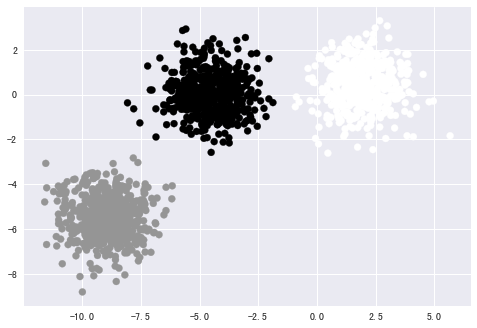

In [10]:
n_samples = 1500
data = datasets.make_moons(n_samples=n_samples, noise=0.2, random_state=0),



In [11]:
metrics.calinski_harabasz_score(X, y_pred)
model.inertia_

10633.868943793219

2862.731914078957

Text(0.5, 1.0, 'input data')

[]

[]

[]

[]

Text(0.5, 1.0, 'kmeans')

[]

[]

Text(0.5, 1.0, '密度聚类')

[]

[]

Text(0.5, 1.0, '谱聚类')

[]

[]

Text(0.5, 1.0, '层次聚类')

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

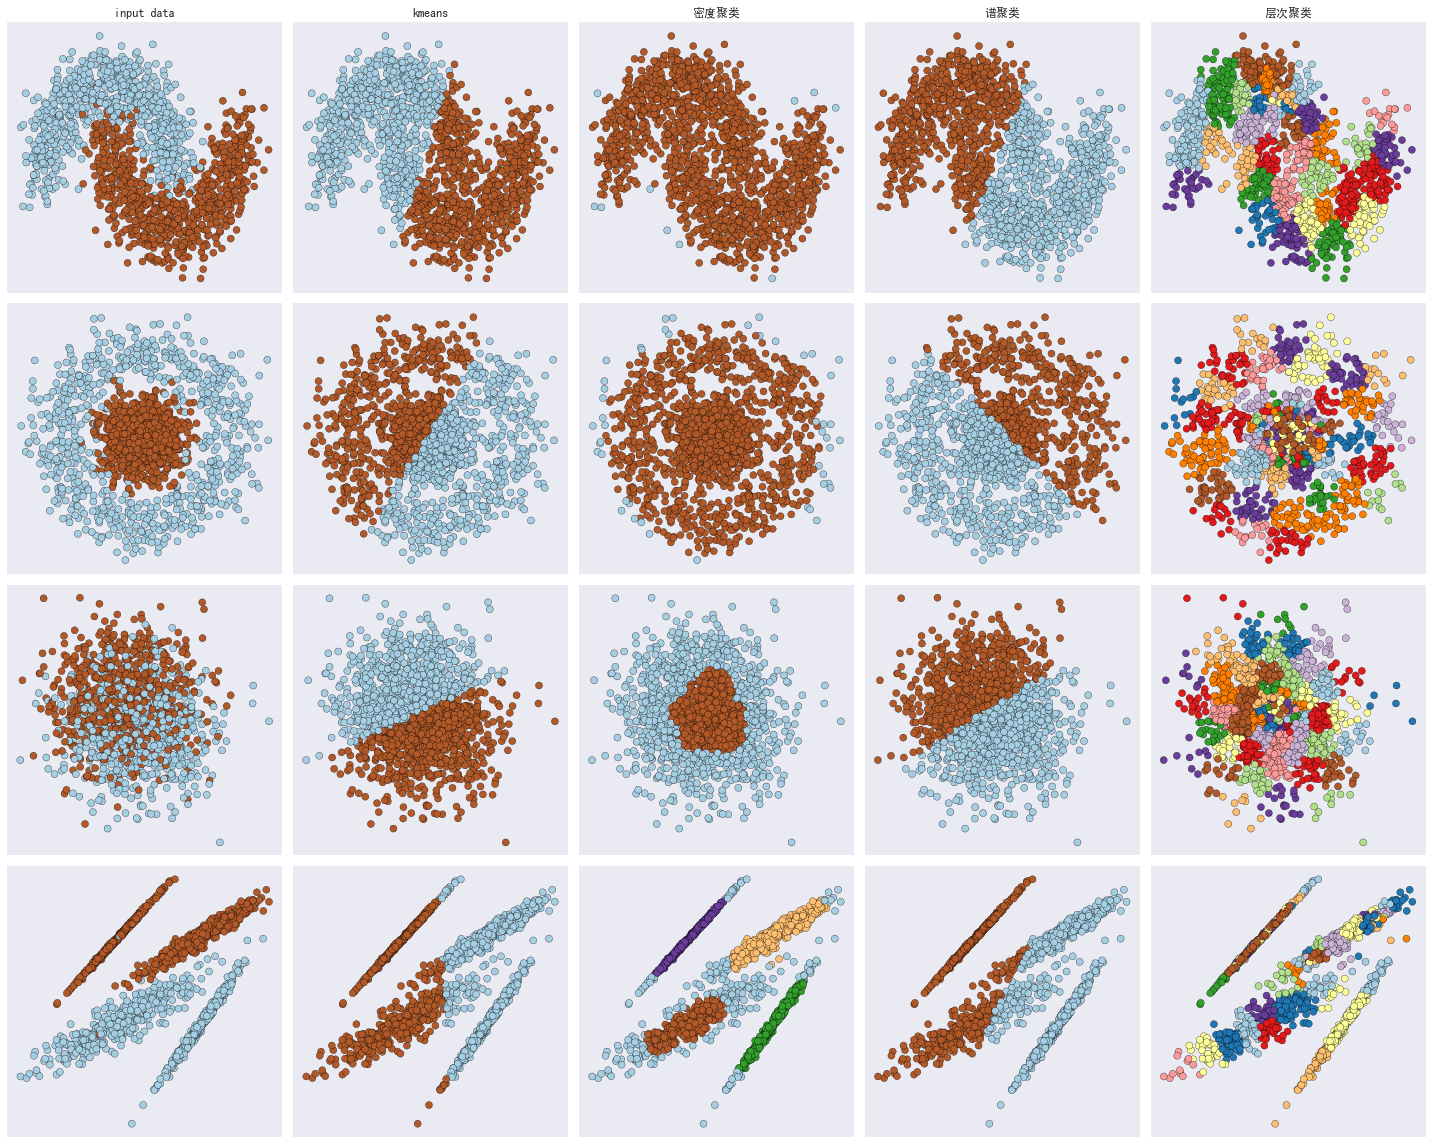

In [25]:
n_samples = 1500
model_list = [cluster.KMeans(n_clusters=2, random_state=66), 
              cluster.DBSCAN(eps=0.3, min_samples=50),
              cluster.SpectralClustering(n_clusters=2, random_state=66),
              cluster.AffinityPropagation()
             ]
titles = ['kmeans', '密度聚类', '谱聚类', '层次聚类']
datasets_ = [
    datasets.make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    datasets.make_circles(n_samples=n_samples, noise=0.2, factor=0.2, random_state=1),
    datasets.make_blobs(n_samples=n_samples, centers=2, random_state=5),
    datasets.make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]

nrows = len(datasets_)
ncols = len(model_list) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
for i_index, (X, y) in enumerate(datasets_):
    # 获取每一行的第一个 也就是获取第一列
    ax = axes[i_index, 0]
    if i_index == 0:
        ax.set_title('input data')
    # 绘制原始的散点图
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())

    # 开始遍历列
    for j_index, model in enumerate(model_list):
        # 获取坐标轴
        ax = axes[i_index, j_index + 1]
        # 建立模型
        y_pred = model.fit_predict(X, y)

        # 绘制散点图
        ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k')

        # 设置坐标轴什么都不显示
        ax.set_xticks(())
        ax.set_yticks(())
        if i_index == 0:
            ax.set_title(titles[j_index])

plt.tight_layout()
plt.show()